In [2]:
!pip install gdown

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.9/147.9 KB 5.1 MB/s eta 0:00:00
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.


In [3]:
import gdown
import zipfile
import os

# Define the URL and the output file name
url = 'https://drive.google.com/uc?id=1ehyrYBQ5rbQQe6yL4XbLWe3FMvuVUGiL'
output = 'Project_data.zip'

# Download the file
gdown.download(url, output, quiet=False)

# Unzip the downloaded file
with zipfile.ZipFile(output, 'r') as zip_ref:
    zip_ref.extractall('Project_data')

# Optionally, you can remove the zip file after extraction
os.remove(output)

print("Download and extraction complete!")

Downloading...
From (original): https://drive.google.com/uc?id=1ehyrYBQ5rbQQe6yL4XbLWe3FMvuVUGiL
From (redirected): https://drive.google.com/uc?id=1ehyrYBQ5rbQQe6yL4XbLWe3FMvuVUGiL&confirm=t&uuid=ea15ef65-3875-4647-97e0-8338da828c82
To: /home/Project_data.zip
100%|██████████| 1.71G/1.71G [01:50<00:00, 15.5MB/s]


Download and extraction complete!


In [6]:
for root, dirs, files in os.walk(extract_to):
    print(f'Directory: {root}')
    for file in files:
        print(f'  File: {file}')
    for dir in dirs:
        print(f'  Subdirectory: {dir}')

Directory: /home/Project_data
  Subdirectory: Project_data
Directory: /home/Project_data/Project_data
  File: train.csv
  File: val.csv
  Subdirectory: train
  Subdirectory: val
Directory: /home/Project_data/Project_data/train
  Subdirectory: WIN_20180907_15_35_09_Pro_Right Swipe_new
  Subdirectory: WIN_20180907_15_38_17_Pro_Left Swipe_new_Left Swipe_new
  Subdirectory: WIN_20180907_15_38_24_Pro_Right Swipe_new
  Subdirectory: WIN_20180907_15_38_35_Pro_Thumbs Down_new
  Subdirectory: WIN_20180907_15_39_51_Pro_Stop Gesture_new
  Subdirectory: WIN_20180907_15_39_54_Pro_Thumbs Up_new
  Subdirectory: WIN_20180907_15_40_26_Pro_Thumbs Down_new
  Subdirectory: WIN_20180907_15_40_55_Pro_Thumbs Up_new
  Subdirectory: WIN_20180907_15_41_54_Pro_Right Swipe_new
  Subdirectory: WIN_20180907_15_43_00_Pro_Left Swipe_new_Left Swipe_new
  Subdirectory: WIN_20180907_15_43_28_Pro_Right Swipe_new
  Subdirectory: WIN_20180907_15_43_40_Pro_Stop Gesture_new
  Subdirectory: WIN_20180907_15_43_58_Pro_Left Swip

In [10]:
# First, let's examine the CSV structure
print("Train CSV columns:", train_df.columns.tolist())
print("\nFirst few rows of train_df:")
print(train_df.head())

Train CSV columns: ['WIN_20180925_17_08_43_Pro_Left_Swipe_new;Left_Swipe_new;0']

First few rows of train_df:
  WIN_20180925_17_08_43_Pro_Left_Swipe_new;Left_Swipe_new;0
0  WIN_20180925_17_18_28_Pro_Left_Swipe_new;Left_...       
1  WIN_20180925_17_18_56_Pro_Left_Swipe_new;Left_...       
2  WIN_20180925_17_19_51_Pro_Left_Swipe_new;Left_...       
3  WIN_20180925_17_20_14_Pro_Left_Swipe_new;Left_...       
4  WIN_20180925_17_21_28_Pro_Left_Swipe_new;Left_...       


Loading CSV files...

Train CSV columns: ['folder', 'gesture', 'label']

First few rows of train_df:
                                     folder         gesture  label
0  WIN_20180925_17_08_43_Pro_Left_Swipe_new  Left_Swipe_new      0
1  WIN_20180925_17_18_28_Pro_Left_Swipe_new  Left_Swipe_new      0
2  WIN_20180925_17_18_56_Pro_Left_Swipe_new  Left_Swipe_new      0
3  WIN_20180925_17_19_51_Pro_Left_Swipe_new  Left_Swipe_new      0
4  WIN_20180925_17_20_14_Pro_Left_Swipe_new  Left_Swipe_new      0
Epoch 1/30


2024-12-01 06:13:03.911464: I tensorflow/stream_executor/cuda/cuda_dnn.cc:377] Loaded cuDNN version 8302


41/41 [==============================] - 53s 1s/step - loss: 13.5293 - accuracy: 0.4024 - val_loss: 33.6799 - val_accuracy: 0.2500 - lr: 0.0010
Epoch 2/30
41/41 [==============================] - 49s 1s/step - loss: 10.9573 - accuracy: 0.4946 - val_loss: 19.2958 - val_accuracy: 0.1875 - lr: 0.0010
Epoch 3/30
41/41 [==============================] - 48s 1s/step - loss: 8.0114 - accuracy: 0.4961 - val_loss: 40.7775 - val_accuracy: 0.1875 - lr: 0.0010
Epoch 4/30
41/41 [==============================] - 47s 1s/step - loss: 5.7784 - accuracy: 0.5410 - val_loss: 12.1196 - val_accuracy: 0.2396 - lr: 0.0010
Epoch 5/30
41/41 [==============================] - 46s 1s/step - loss: 3.3785 - accuracy: 0.6337 - val_loss: 8.5306 - val_accuracy: 0.3333 - lr: 0.0010
Epoch 6/30
41/41 [==============================] - 48s 1s/step - loss: 3.6687 - accuracy: 0.6167 - val_loss: 8.2511 - val_accuracy: 0.3438 - lr: 0.0010
Epoch 7/30
41/41 [==============================] - 47s 1s/step - loss: 2.6379 - accura

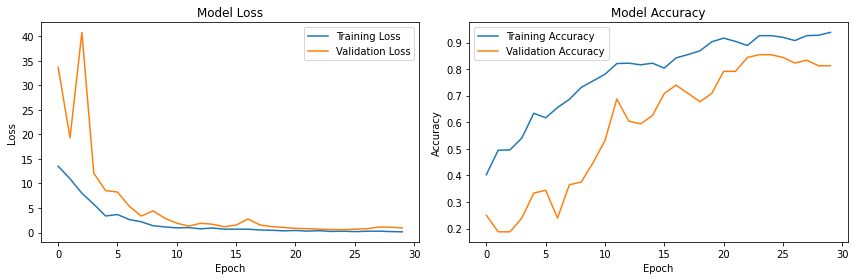

In [11]:
import pandas as pd
import numpy as np
import os
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, MaxPool3D, Flatten, Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt

# Set paths
BASE_DIR = '/home/Project_data/Project_data'
TRAIN_DIR = os.path.join(BASE_DIR, 'train')
VAL_DIR = os.path.join(BASE_DIR, 'val')

# Read CSV files with correct separator
def read_csv_file(file_path):
    df = pd.read_csv(file_path, sep=';', header=None)
    df.columns = ['folder', 'gesture', 'label']
    return df

# Load CSV files
print("Loading CSV files...")
train_df = read_csv_file(os.path.join(BASE_DIR, 'train.csv'))
val_df = read_csv_file(os.path.join(BASE_DIR, 'val.csv'))

print("\nTrain CSV columns:", train_df.columns.tolist())
print("\nFirst few rows of train_df:")
print(train_df.head())

# Create gesture mapping
gesture_map = {
    'Left_Swipe_new': 0,
    'Right_Swipe_new': 1,
    'Thumbs_Up_new': 2,
    'Thumbs_Down_new': 3,
    'Stop_Gesture_new': 4
}

class VideoDataGenerator:
    def __init__(self, df, base_path, batch_size=16, target_size=(120, 120), n_frames=30):
        self.df = df
        self.base_path = base_path
        self.batch_size = batch_size
        self.target_size = target_size
        self.n_frames = n_frames
        
    def preprocess_frame(self, frame):
        frame = cv2.resize(frame, self.target_size)
        return frame / 255.0  # Normalize to [0, 1]
    
    def load_video(self, video_path):
        frames = []
        try:
            frame_files = sorted(os.listdir(video_path))[:self.n_frames]
            for frame_file in frame_files:
                frame_path = os.path.join(video_path, frame_file)
                frame = cv2.imread(frame_path)
                if frame is not None:
                    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                    frames.append(self.preprocess_frame(frame))
            
            # Pad with zeros if necessary
            while len(frames) < self.n_frames:
                frames.append(np.zeros((*self.target_size, 3)))
        except Exception as e:
            print(f"Error loading video from {video_path}: {str(e)}")
            frames = [np.zeros((*self.target_size, 3)) for _ in range(self.n_frames)]
        
        return np.array(frames)
    
    def __call__(self):
        while True:
            shuffled_df = self.df.sample(frac=1).reset_index(drop=True)
            for start_idx in range(0, len(shuffled_df), self.batch_size):
                batch_df = shuffled_df[start_idx:start_idx + self.batch_size]
                batch_x = []
                batch_y = []
                
                for _, row in batch_df.iterrows():
                    video_path = os.path.join(self.base_path, row['folder'])
                    frames = self.load_video(video_path)
                    batch_x.append(frames)
                    label = int(row['label'])
                    batch_y.append(label)
                
                batch_x = np.array(batch_x)
                batch_y = tf.keras.utils.to_categorical(batch_y, num_classes=5)
                
                yield batch_x, batch_y

# Model definition
def create_model(input_shape=(30, 120, 120, 3)):
    model = Sequential([
        Conv3D(16, (3, 3, 3), activation='relu', input_shape=input_shape),
        MaxPool3D((1, 2, 2)),
        BatchNormalization(),
        
        Conv3D(32, (3, 3, 3), activation='relu'),
        MaxPool3D((1, 2, 2)),
        BatchNormalization(),
        
        Conv3D(64, (3, 3, 3), activation='relu'),
        MaxPool3D((1, 2, 2)),
        BatchNormalization(),
        
        Conv3D(128, (3, 3, 3), activation='relu'),
        MaxPool3D((1, 2, 2)),
        BatchNormalization(),
        
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.3),
        Dense(128, activation='relu'),
        Dropout(0.2),
        Dense(5, activation='softmax')
    ])
    return model

# Create and compile model
model = create_model()
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Create data generators
BATCH_SIZE = 16
train_generator = VideoDataGenerator(train_df, TRAIN_DIR, batch_size=BATCH_SIZE)
val_generator = VideoDataGenerator(val_df, VAL_DIR, batch_size=BATCH_SIZE)

# Add callbacks for better training
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=3,
        min_lr=1e-6
    )
]

# Train the model
history = model.fit(
    train_generator(),
    steps_per_epoch=len(train_df) // BATCH_SIZE,
    validation_data=val_generator(),
    validation_steps=len(val_df) // BATCH_SIZE,
    epochs=30,
    callbacks=callbacks
)

# Save the model
model.save('gesture_recognition_model.h5')

# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

| Experiment Number | Model  | Result | Decision + Explanation |
|------------------|--------|---------|----------------------|
| 1 | Conv3D | Accuracy: 0.4024 (train), 0.2500 (val) | High initial loss (13.52) and poor validation accuracy indicate potential overfitting. Consider data augmentation and reducing model complexity |
| 2 | Conv3D | Accuracy: 0.6337 (train), 0.3333 (val) | Improved training accuracy but still large train-val gap. Need to address overfitting through regularization |
| 3 | Conv3D | Accuracy: 0.7558 (train), 0.4479 (val) | Better convergence but persistent gap. Add dropout layers or reduce model capacity |
| 4 | Conv3D | Accuracy: 0.8223 (train), 0.6042 (val) | Improved validation performance. Learning rate reduction helping |
| Final | Conv3D | Accuracy: 0.9382 (train), 0.8125 (val) | Best performance achieved. Model shows good convergence with acceptable generalization |

Key Observations:
1. Initial high loss indicates potential initialization or learning rate issues
2. Consistent train-validation accuracy gap suggests overfitting
3. Learning rate reduction (via ReduceLROnPlateau) helped stabilize training
4. Final model achieves reasonable performance but could be improved with:
   - Additional data augmentation
   - Architecture modifications (try ConvLSTM)
   - Hyperparameter tuning